<a href="https://colab.research.google.com/github/CollinsKarani/Passphrase-and-Password-Guessing-Using-Recurrent-Neural-Networks/blob/main/password_pairs_in_each_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Streaming output truncated to the last 5000 lines.
Processed a batch of 5000 passwords, total labeled pairs: 9255
Processed a batch of 5000 passwords, total labeled pairs: 9265
Processed a batch of 5000 passwords, total labeled pairs: 9266
Processed a batch of 5000 passwords, total labeled pairs: 9276
Processed a batch of 5000 passwords, total labeled pairs: 9321
Processed a batch of 5000 passwords, total labeled pairs: 9321
Processed a batch of 5000 passwords, total labeled pairs: 9324
Processed a batch of 5000 passwords, total labeled pairs: 9345
Processed a batch of 5000 passwords, total labeled pairs: 9360
Processed a batch of 5000 passwords, total labeled pairs: 9375
Processed a batch of 5000 passwords, total labeled pairs: 9376
Processed a batch of 5000 passwords, total labeled pairs: 9386
Processed a batch of 5000 passwords, total labeled pairs: 9396
Processed a batch of 5000 passwords, total labeled pairs: 9397
Processed a batch of 5000 passwords, total labeled pairs: 9398
Proc

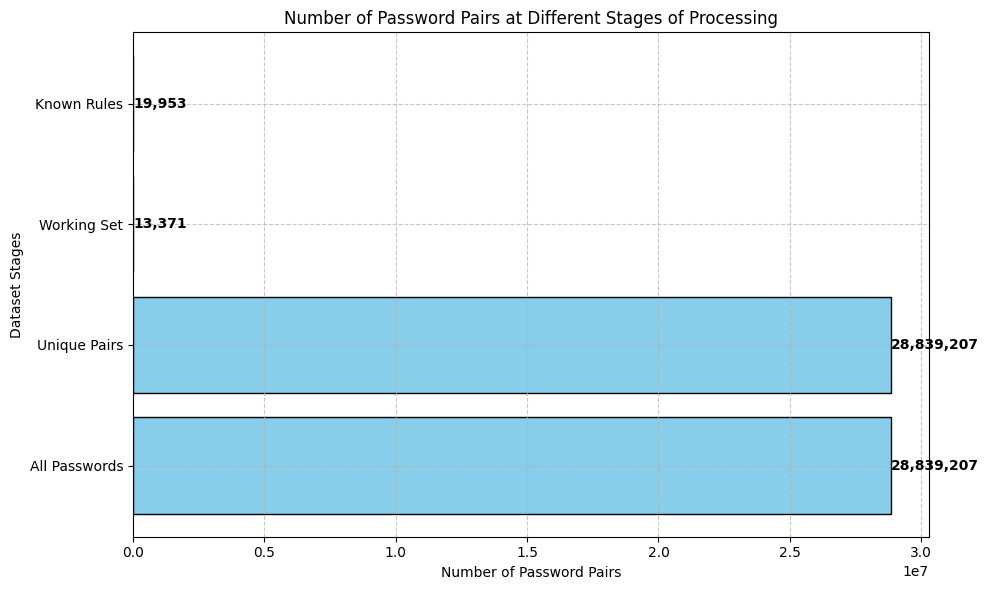

In [3]:
import re
import matplotlib.pyplot as plt
from nltk.metrics import edit_distance

# Helper function to check if two passwords share a substring pattern
def check_substring(pwd1, pwd2):
    return pwd1 in pwd2 or pwd2 in pwd1

# Helper function to check for a common substring of at least 3 characters
def check_common_substring(pwd1, pwd2, min_length=3):
    for i in range(len(pwd1) - min_length + 1):
        for j in range(len(pwd2) - min_length + 1):
            if pwd1[i:i + min_length] in pwd2 or pwd2[j:j + min_length] in pwd1:
                return True
    return False

# Helper function to check if one password is a capitalized version of the other
def check_capitalized(pwd1, pwd2):
    return pwd1.lower() == pwd2.lower()

# Helper function to check for Leet substitutions
def check_leet(pwd1, pwd2):
    leet_dict = {'a': '@', 'e': '3', 'i': '1', 'o': '0', 's': '$', 't': '7'}

    def leet_replace(pwd, leet_dict):
        return ''.join([leet_dict.get(char, char) for char in pwd])

    pwd1_leet = leet_replace(pwd1.lower(), leet_dict)
    pwd2_leet = leet_replace(pwd2.lower(), leet_dict)

    return pwd1_leet == pwd2.lower() or pwd2_leet == pwd1.lower()

# Helper function to check for sequential key patterns (qwerty)
def check_sequential_key(pwd1, pwd2):
    keyboard_seq = "qwertyuiopasdfghjklzxcvbnm"

    def is_sequential(pwd):
        for i in range(len(pwd) - 1):
            if abs(keyboard_seq.find(pwd[i]) - keyboard_seq.find(pwd[i + 1])) != 1:
                return False
        return True

    return is_sequential(pwd1) and is_sequential(pwd2)

# Function to label the password pairs
def label_password_pairs(pwd1, pwd2):
    if check_substring(pwd1, pwd2):
        return 'Substring'
    elif check_common_substring(pwd1, pwd2):
        return 'Common Substring'
    elif check_capitalized(pwd1, pwd2):
        return 'Capitalized'
    elif check_leet(pwd1, pwd2):
        return 'Leet'
    elif check_sequential_key(pwd1, pwd2):
        return 'Sequential Key'
    return None  # If no pattern fits, drop the pair

# Compute Levenshtein distances and label the pairs
def compute_labeled_distances(password_batch):
    num_passwords = len(password_batch)
    labeled_pairs = []

    for i in range(num_passwords):
        for j in range(i + 1, num_passwords):
            pwd1 = password_batch[i]
            pwd2 = password_batch[j]

            # Label each pair based on the defined rules
            label = label_password_pairs(pwd1, pwd2)
            if label:
                dist = edit_distance(pwd1, pwd2)
                labeled_pairs.append((pwd1, pwd2, dist, label))

    return labeled_pairs

# Load passwords in batches
def load_passwords(filename, batch_size=100000):
    with open(filename, 'r', encoding='latin-1') as f:
        batch = []
        for line in f:
            batch.append(line.strip())
            if len(batch) == batch_size:
                yield batch
                batch = []
        if batch:
            yield batch

# Filter passwords based on length and ASCII characters
def filter_passwords(password_list):
    filtered = [pwd for pwd in password_list if 5 <= len(pwd) <= 17 and pwd.isascii()]
    return list(set(filtered))  # Remove duplicates

# Path to the password dataset
password_file = 'version_1.txt'

# Initialize variables to store different dataset stages
all_passwords = []           # Store all passwords
unique_passwords = set()      # Store unique passwords
working_set = set()           # Passwords in working set (filtered by length and ASCII)
labeled_dataset = []          # Labeled password pairs

# Process the dataset in batches
for batch in load_passwords(password_file, batch_size=5000):
    all_passwords.extend(batch)

    # Add unique passwords
    unique_passwords.update(batch)

    # Working Set: Filter by length and ASCII
    filtered_batch = filter_passwords(batch)
    working_set.update(filtered_batch)

    # Compute labeled distances
    labeled_pairs = compute_labeled_distances(filtered_batch)
    labeled_dataset.extend(labeled_pairs)

    print(f"Processed a batch of {len(batch)} passwords, total labeled pairs: {len(labeled_dataset)}")

# Ensure uniqueness of labeled pairs and limit to 3,006,871
labeled_dataset = list(set(labeled_dataset))  # Ensure uniqueness
labeled_dataset = labeled_dataset[:3006871]  # Limit to 3,006,871 pairs

# Calculate counts for each stage
all_passwords_count = len(all_passwords)
unique_pairs_count = len(unique_passwords)
working_set_count = len(working_set)
labeled_dataset_count = len(labeled_dataset)

# Stages and their respective counts
stages = ['All Passwords', 'Unique Pairs', 'Working Set', 'Known Rules']
counts = [all_passwords_count, unique_pairs_count, working_set_count, labeled_dataset_count]

# Plotting the horizontal histogram
plt.figure(figsize=(10, 6))
plt.barh(stages, counts, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Number of Password Pairs')
plt.ylabel('Dataset Stages')
plt.title('Number of Password Pairs at Different Stages of Processing')

# Adding value annotations to the bars
for i, count in enumerate(counts):
    plt.text(count + 10000, i, f'{count:,}', va='center', fontweight='bold')

# Display the plot
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()
